<a href="https://colab.research.google.com/github/syifaniads/KAL-CODE/blob/main/Praktikum_4_Syifani%20Adillah%20Salsabila_235150207111052.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum Kecerdasan Artifisial Lanjut


---
## Bab 4. Pemrosesan Awal Data






### 1) Import Data

Unduh dataset yang akan digunakan pada praktikum kali ini. Anda dapat menggunakan aplikasi **wget** untuk mendowload dataset dan menyimpannya dalam Google Colab. Jalankan cell di bawah ini untuk mengunduh **dataset sebagai latihan awal**. Untuk **tugas** gunakan **dataset yang tertera di modul praktikum (ada perbedaan *dataset*)**.

In [16]:
import pandas as pd
import numpy as np
data = pd.read_csv('iris_missing.csv')

Setelah dataset berhasil diunduh, langkah berikutnya adalah membaca dataset dengan memanfaatkan fungsi [readcsv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) dari library pandas. Lakukan pembacaan berkas csv menggunakan fungsi **readcsv**. Jangan lupa untuk melakukan import library pandas terlebih dahulu

In [11]:
iris_df = pd.read_csv('/content/iris_missing.csv')

Tampilkan beberapa baris dari dataset untuk mendapatkan informasi singkat mengenai isi data. Gunakan fungsi **head()** untuk menampilkan 5 data pertama.

In [12]:
print (iris_df.head(6))
print (iris_df.shape)
print (iris_df.describe())
print(iris_df.groupby('Species').size())

   sepal_length  sepal_width  petal_length  petal_width      Species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           0.0          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
(150, 5)
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.731333     2.988000      3.684667     1.147333
std        1.153352     0.604893      1.826675     0.773790
min        0.000000     0.000000      0.000000     0.000000
25%        5.100000     2.800000      1.500000     0.225000
50%        5.800000     3.000000      4.300000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.40

Berdasarkan informasi dari fungsi **head()**, data iris yang
digunakan mempunyai 4 fitur sebagai berikut :


1.   sepal length
2.   sepal width
3.   petal length
4.   petal width

### 2) Cek Tipe Data dan Statistik Sederhana

Lakukan pengecekan dan pengubahan tipe data apabila tidak sesuai yang diharapkan

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Coba panggil metode `describe()` dan `info()`. Jelaskan apa perbedaannya sebagai komentar.

In [21]:
data['sepal_length'] = data['sepal_length'].astype(np.float32)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float32
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float32(1), float64(3), object(1)
memory usage: 5.4+ KB


In [ ]:
# penjelasan
# Karena

### 3) Missing value dan imputasi data




Jika Anda perhatikan dengan seksama, data pada baris ke-3 (index 2) pada fitur sepal length memiliki nilai 0.0. Hal ini menandakan adanya missing value pada data. Jalankan cell di bawah ini untuk mendapatkan semua data yang mengandung missing value. Pencarian data yang mengandung missing value dilakukan dengan tahapan sebagai berikut:


1.   Membuat filter untuk mencari data dengan sepal_length = 0, sepal_width = 0, petal_length = 0, petal_width =0
2.   Mencari data yang memenuhi kondisi1 **atau** kondisi2 **atau** kondisi3 **atau** kondisi4 menggunakan property [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) pada dataframe



In [22]:
kondisi1 = data['sepal_length'] == 0.0
kondisi2 = data['sepal_width'] == 0.0
kondisi3 = data['petal_length'] == 0.0
kondisi4 = data['petal_width'] == 0.0
data.loc[kondisi1 | kondisi2 | kondisi3 | kondisi4]

,sepal_length,sepal_width,petal_length,petal_width,Species
2,0.0,3.2,1.3,0.2,Iris-setosa
11,0.0,3.4,1.6,0.2,Iris-setosa
32,5.2,0.0,1.5,0.1,Iris-setosa
47,4.6,3.2,0.0,0.2,Iris-setosa
51,6.4,0.0,4.5,1.5,Iris-versicolor
65,6.7,3.1,4.4,0.0,Iris-versicolor
67,5.8,2.7,0.0,1.0,Iris-versicolor
86,6.7,0.0,4.7,1.5,Iris-versicolor
107,0.0,2.9,6.3,1.8,Iris-virginica
112,6.8,3.0,0.0,2.1,Iris-virginica


Penanganan missing value pada Pandas akan lebih mudah apabila data yang hilang (bernilai 0.0) diganti dengan NaN (Not A Number). Gunakan properti **replace** pada dataframe untuk menggganti 0.0 menjadi NaN

In [24]:
data = data.replace(0.0, np.NaN)

Terdapat beberapa cara untuk mengatasi permasalahan missing value pada data. Salah satu cara yang sederhana adalah dengan mengganti nilai NaN pada suatu fitur dengan rata-rata nilai fitur tersebut pada data lain yang bernilai bukan Nan. Perhatikan bahwa Anda harus mengganti nilai NaN dengan rata-rata data lain yang memiliki kategori (species) yang sama.

Fungsi-fungsi pada Pandas yang dapat Anda manfaatkan:


1.   **transform** untuk mengaplikasikan fungsi tertentu pada dataframe, pada permasalahan ini fungsi yang digunakan adalah fungsi **mean**
2.   **groupby** untuk mengelompokkan dataframe berdasarkan nilai kolom tertentu, pada permasalahan ini kolom yang digunakan adalah **species**
3. **fillna** untuk mengganti nilai NaN dengan nilai yang telah ditentukan




Buatlah fungsi bernama **imputasi** yang melakukan tahapan berikut:


1.   Menghitung rata-rata masing-masing kolom berdasarkan kelasnya
2.   Mengisi kolom yang berisi NaN dengan rata-rata kelas yang sesuai




In [26]:
def imputasi(df_input):
  list_columns = df_input.columns  #mendapatkan daftar kolom pada Dataframe
  class_column = list_columns[-1]  #kolom terakhir merupakan kolom kelas
  for column in list_columns[:-1]:
    #pergantian nilai NaN dilakukan per kolom
    df_input[column] = df_input[column].fillna(df_input.groupby(class_column)[column].transform('mean'))
  return df_input

Buatlah sebuah dataframe baru bernama **data_imputasi** yang berisi dataset dengan nilai NaN yang sudah diganti dengan cara memanggil fungsi **imputasi**.

In [27]:
data_imputasi = imputasi(data)

Cek apakah masih terdapat nilai NaN pada dataframe.

In [28]:
data_imputasi.isnull().values.any()

False

In [29]:
data_imputasi.isna().any

<bound method DataFrame.any of      sepal_length  sepal_width  petal_length  petal_width  Species
0           False        False         False        False    False
1           False        False         False        False    False
2           False        False         False        False    False
3           False        False         False        False    False
4           False        False         False        False    False
..            ...          ...           ...          ...      ...
145         False        False         False        False    False
146         False        False         False        False    False
147         False        False         False        False    False
148         False        False         False        False    False
149         False        False         False        False    False

[150 rows x 5 columns]>

### 4) Pencarian Outlier
Lakukan plotting terhadap semua fitur pada dataset Iris. Hasil yang diharapkan seperti contoh berikut:
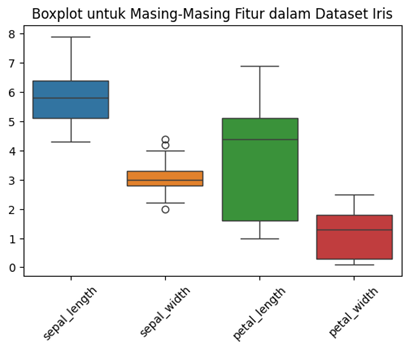

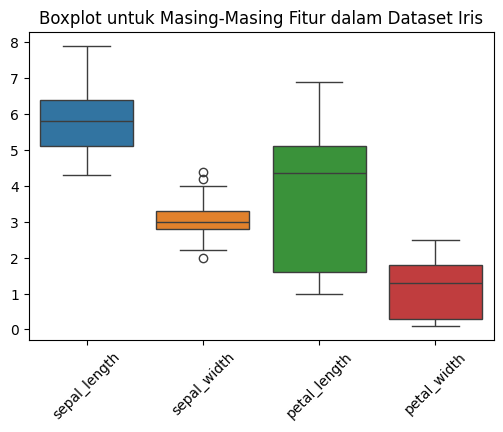

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(data=data_imputasi)
plt.xticks(rotation=45) #Memiringkan label sumbu x agar lebih terbaca
plt.title("Boxplot untuk Masing-Masing Fitur dalam Dataset Iris")
plt.show()

Coba cari *outlier* dengan kode Python

In [37]:
  Q1 = data['sepal_width'].quantile(0.25) #kuartil Pertama (Q1)
  Q3 = data['sepal_width'].quantile(0.75) #kuartil Kedua (Q2)
  IQR = Q3-Q1 # Rentang interquartil

  #Menentukan batas bawah dan atas untuk outlier
  lower_bound = Q1 - 1.5 * IQR #Menentukan batas bawag outlier, gunakan rumus di dasar teori
  upper_bound = Q3 + 1.5 * IQR #Menentukan batas atas outlier, gunakan rumus di dasar teori

In [41]:
# Menghapus outlier dari data
data_without_outliers = data[~((data['sepal_width'] < lower_bound) | (data['sepal_width'] > upper_bound))]

### 5) Normalisasi MinMax
Normalisasi bertujuan menyamakan rentang nilai pada setiap fitur. Beberapa metode pembelajaran mesin memiliki kinerja yang buruk apabila rentang nilai tiap variabel berbeda jauh.

Sebelum melakukan normalisasi, cek terlebih dahulu rentang (nilai max - nilai min) pada masing masing fitur

In [43]:
def cetak_rentang(df_input):
    #mengambil nama kolom, kecuali yang terakhir (kelas)
    list_fitur = df_input.columns[:-1]
    for fitur in list_fitur:
        max = df_input[fitur].max()
        min = df_input[fitur].min()
        print("Rentang fitur ", fitur, " adalah ", max-min)

cetak_rentang(data_imputasi)

Rentang fitur  sepal_length  adalah  3.5999999046325684
Rentang fitur  sepal_width  adalah  2.4000000000000004
Rentang fitur  petal_length  adalah  5.9
Rentang fitur  petal_width  adalah  2.4


Terlihat bahwa masing-masing fitur memiliki rentang yang berbeda, meskipun tidak terlalu signifikan. Pada praktikum ini Anda akan mengimplementasikan normalisasi MinMax untuk menyamakan rentang setiap fitur menjadi satu (1). Persamaan dari fungsi normalisasi MinMax adalah sebagai berikut:

$x'=\frac{x-min(x)}{max(x)-min(x)}$

dimana $x'$ merupakan nilai ternormalisasi, $x$ adalah nilai asal, $min(x)$ merupakan nilai minimum pada suatu fitur, dan $max(x)$ merupakan nilai maksimum pada suatu fitur.

Implementasikan metode normalisasi MinMax pada fungsi bernama **minmax**.


In [47]:
def minmax(df_input):
    list_fitur = df_input.columns[:-1]
    for fitur in list_fitur:
        max = df_input[fitur].max()
        min = df_input[fitur].min()
        df_input[fitur] = (df_input[fitur] - min) / (max - min)
    return df_input

Buatlah sebuah dataframe baru bernama **data_normal** yang berisi hasil dari metode minmax dengan input **data_imputasi**

In [51]:
data_normal = minmax(data_imputasi)

Cek 5 baris pertama **data_normal**

In [52]:
data_normal.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.199074,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


Tampilkan rentang masing-masing fitur menggunakan fungsi **cetak_rentang** yang telah dibuat

In [53]:
cetak_rentang(data_normal)

Rentang fitur  sepal_length  adalah  1.0
Rentang fitur  sepal_width  adalah  1.0
Rentang fitur  petal_length  adalah  1.0
Rentang fitur  petal_width  adalah  1.0


### 6) Label Encoding

Lakukan *label encoding* pada variabel target "Species", sehingga nantinya misalnya Iris setosa menjadi 0, versicolor menjadi 1, virginica menjadi 2

In [55]:
def label_encoding(x):
  if 'setosa' in x:
    return 0
  elif 'versicolor' in x:
    return 1
  elif 'virginica' in x:
    return 2

Tampilkan hasil DataFrame pada 10 data pertama dan terakhir menggunakan `head()` dan `tail()`

In [58]:
print(data_normal.head(10))
print(data_normal.tail(10))

   sepal_length  sepal_width  petal_length  petal_width      Species
0      0.222222     0.625000      0.067797     0.041667  Iris-setosa
1      0.166667     0.416667      0.067797     0.041667  Iris-setosa
2      0.199074     0.500000      0.050847     0.041667  Iris-setosa
3      0.083333     0.458333      0.084746     0.041667  Iris-setosa
4      0.194444     0.666667      0.067797     0.041667  Iris-setosa
5      0.305556     0.791667      0.118644     0.125000  Iris-setosa
6      0.083333     0.583333      0.067797     0.083333  Iris-setosa
7      0.194444     0.583333      0.084746     0.041667  Iris-setosa
8      0.027778     0.375000      0.067797     0.041667  Iris-setosa
9      0.166667     0.458333      0.084746     0.000000  Iris-setosa
     sepal_length  sepal_width  petal_length  petal_width         Species
140      0.666667     0.458333      0.779661     0.958333  Iris-virginica
141      0.722222     0.458333      0.694915     0.916667  Iris-virginica
142      0.416667  

## TUGAS
1. Implementasikan metode normalisasi Z-score dengan cara membuat fungsi bernama **zscore**.
2. Normalisasikan dataframe **data_imputasi** menggunakan fungsi **zscore**. Simpan hasilnya pada dataframe bernama **data_zscore**.
3. Jelaskan perbedaan hasil normalisasi **MinMax** dan **ZScore**. Petunjuk : cek nilai rentang, rata-rata dan standar deviasi dari **data_zscore**.


In [64]:
def zscore(df_input):
    df_numeric = df_input.select_dtypes(include=['number']).copy()
    list_fitur = df_numeric.columns

    for fitur in list_fitur:
        mean = df_numeric[fitur].mean()  # Rata-rata fitur
        std = df_numeric[fitur].std()    # Standar deviasi fitur
        df_numeric[fitur] = (df_numeric[fitur] - mean) / std  # Normalisasi Z-score

    return df_numeric


   sepal_length  sepal_width  petal_length  petal_width
0     -0.907826     1.053430     -1.336763    -1.312509
1     -1.152508    -0.110540     -1.336763    -1.312509
2     -1.009776     0.355048     -1.393408    -1.312509
3     -1.519531     0.122254     -1.280117    -1.312509
4     -1.030167     1.286224     -1.336763    -1.312509

Statistik Z-score:
        sepal_length   sepal_width  petal_length  petal_width
count  1.500000e+02  1.500000e+02  1.500000e+02   150.000000
mean  -2.797445e-07  2.842171e-16  9.473903e-17     0.000000
std    9.999999e-01  1.000000e+00  1.000000e+00     1.000000
min   -1.886553e+00 -2.438481e+00 -1.563346e+00    -1.444215
25%   -9.078258e-01 -5.761283e-01 -1.223471e+00    -1.180803
50%   -5.143868e-02 -1.105402e-01  3.342870e-01     0.136255
75%    6.826069e-01  5.878419e-01  7.591302e-01     0.794783
max    2.517722e+00  3.148577e+00  1.778754e+00     1.716724


In [65]:
data_zscore = zscore(data_imputasi)

Tuliskan jawaban pertanyaan nomor 3 **di sini**

In [66]:
# Cek hasil normalisasi
print(data_zscore.head())
print("\nStatistik Z-score:\n", data_zscore.describe())

   sepal_length  sepal_width  petal_length  petal_width
0     -0.907826     1.053430     -1.336763    -1.312509
1     -1.152508    -0.110540     -1.336763    -1.312509
2     -1.009776     0.355048     -1.393408    -1.312509
3     -1.519531     0.122254     -1.280117    -1.312509
4     -1.030167     1.286224     -1.336763    -1.312509

Statistik Z-score:
        sepal_length   sepal_width  petal_length  petal_width
count  1.500000e+02  1.500000e+02  1.500000e+02   150.000000
mean  -2.797445e-07  2.842171e-16  9.473903e-17     0.000000
std    9.999999e-01  1.000000e+00  1.000000e+00     1.000000
min   -1.886553e+00 -2.438481e+00 -1.563346e+00    -1.444215
25%   -9.078258e-01 -5.761283e-01 -1.223471e+00    -1.180803
50%   -5.143868e-02 -1.105402e-01  3.342870e-01     0.136255
75%    6.826069e-01  5.878419e-01  7.591302e-01     0.794783
max    2.517722e+00  3.148577e+00  1.778754e+00     1.716724
